In [39]:
import pandas as pd

STORE = "MONGODB"

IN_FILE = "out.csv" # if using CSV Store

data = None

if STORE == "MONGODB":
    import pymongo
    mongo_client = pymongo.MongoClient()
    mongo_db = mongo_client.tls_survey
    mongo_docs = mongo_db.sites.find({}, {'_id': 0}) # Get all entries but not the id
    data = pd.DataFrame(list(mongo_docs))
    
elif STORE == "CSV":
    data = pd.read_csv(IN_FILE)

In [40]:
data

,answer_malformed,http_version,site,ssl_cipher
0,404IN,2,google.com,TLS_AES_256_GCM_SHA384
1,429,2,reddit.com,ECDHE-RSA-AES128-GCM-SHA256
2,200,2,live.com,ECDHE-RSA-AES256-GCM-SHA384
3,404,2,youtube.com,TLS_AES_256_GCM_SHA384
4,404,2,rentlx.com,ECDHE-RSA-AES128-GCM-SHA256
5,404IN,2,facebook.com,TLS_CHACHA20_POLY1305_SHA256
6,404,2,mattsowardsofficial.com,ECDHE-RSA-AES256-GCM-SHA384
7,404,2,panda.tv,ECDHE-RSA-AES128-GCM-SHA256
8,404IN,2,bing.com,ECDHE-RSA-AES256-GCM-SHA384
9,404IN,2,wikipedia.org,ECDHE-ECDSA-CHACHA20-POLY1305


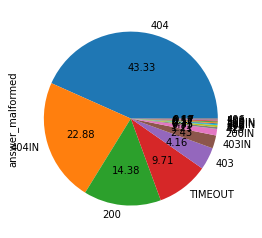

In [34]:
data["answer_malformed"].value_counts().plot.pie(autopct='%.2f');

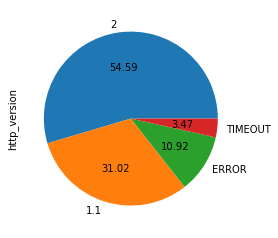

In [35]:
data["http_version"].value_counts().plot.pie(autopct='%.2f');

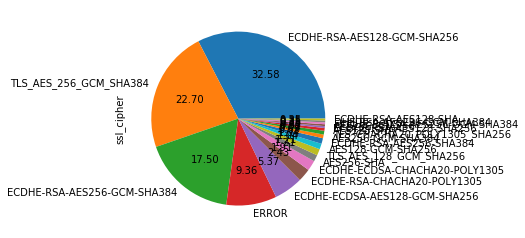

In [37]:
data["ssl_cipher"].value_counts().plot.pie(autopct='%.2f');

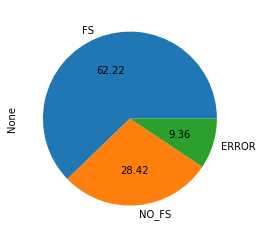

In [38]:
pd.Series(["FS" if "DHE" in x else x if x in ["ERROR", "TIMEOUT"] else "NO_FS" for x in data["ssl_cipher"]]).value_counts().plot.pie(autopct='%.2f');